['c:\\Users\\eliah\\Documents\\Master\\Eliah-Masters\\GO', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0', '', 'C:\\Users\\eliah\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages', 'C:\\Users\\eliah\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\win32', 'C:\\Users\\eliah\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\eliah\\AppDa

INFO:root:Pipeline setup with estimators: [('select_k', SelectKBest()), ('estimator', RandomForestClassifier())]


Before data checking:
Features: GO  GO:0000003  GO:0000006  GO:0000009  GO:0000014  GO:0000015  GO:0000018  \
1          1.0         0.0         0.0         0.0         0.0         0.0   
2          1.0         0.0         0.0         0.0         0.0         0.0   
3          0.0         0.0         0.0         0.0         0.0         0.0   
4          0.0         0.0         0.0         0.0         0.0         0.0   
5          1.0         0.0         0.0         0.0         0.0         0.0   

GO  GO:0000023  GO:0000025  GO:0000026  GO:0000027  ...  GO:2001241  \
1          0.0         0.0         0.0         1.0  ...         0.0   
2          0.0         0.0         0.0         1.0  ...         0.0   
3          0.0         0.0         0.0         1.0  ...         0.0   
4          0.0         0.0         0.0         1.0  ...         0.0   
5          0.0         0.0         0.0         1.0  ...         0.0   

GO  GO:2001242  GO:2001243  GO:2001251  GO:2001267  GO:2001269  GO:20013

INFO:root:Best parameters: {'estimator': RandomForestClassifier(random_state=42), 'estimator__max_depth': 10, 'estimator__n_estimators': 100, 'select_k__k': 1000}
INFO:root:MCC: 0.170, ROC AUC: 0.536


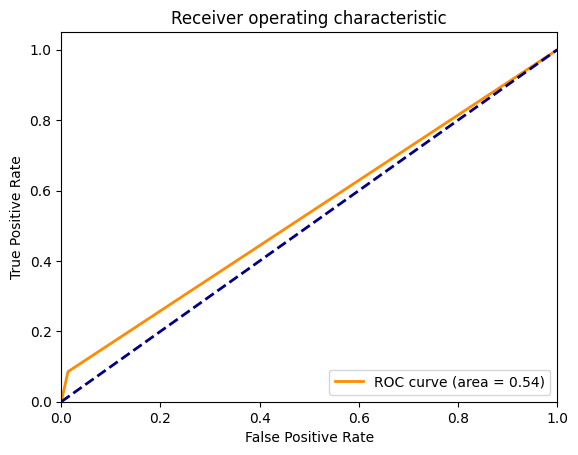

INFO:root:Processing estimator: RandomForestClassifier
INFO:root:Testing with k=1


The best model does not support feature importance.


INFO:root:Testing with k=21
INFO:root:Testing with k=41
INFO:root:Testing with k=61
INFO:root:Testing with k=81
INFO:root:Testing with k=101
INFO:root:Testing with k=121
INFO:root:Testing with k=141
INFO:root:Testing with k=161
INFO:root:Testing with k=181
INFO:root:Testing with k=201
INFO:root:Testing with k=221
INFO:root:Testing with k=241
INFO:root:Testing with k=261
INFO:root:Testing with k=281
INFO:root:Testing with k=301
INFO:root:Testing with k=321
INFO:root:Testing with k=341
INFO:root:Testing with k=361
INFO:root:Testing with k=381
INFO:root:Testing with k=401
INFO:root:Testing with k=421
INFO:root:Testing with k=441
INFO:root:Testing with k=461
INFO:root:Testing with k=481
INFO:root:Testing with k=501
INFO:root:Testing with k=521
INFO:root:Testing with k=541
INFO:root:Testing with k=561
INFO:root:Testing with k=581
INFO:root:Testing with k=601
INFO:root:Testing with k=621
INFO:root:Testing with k=641
INFO:root:Testing with k=661
INFO:root:Testing with k=681
INFO:root:Testing 

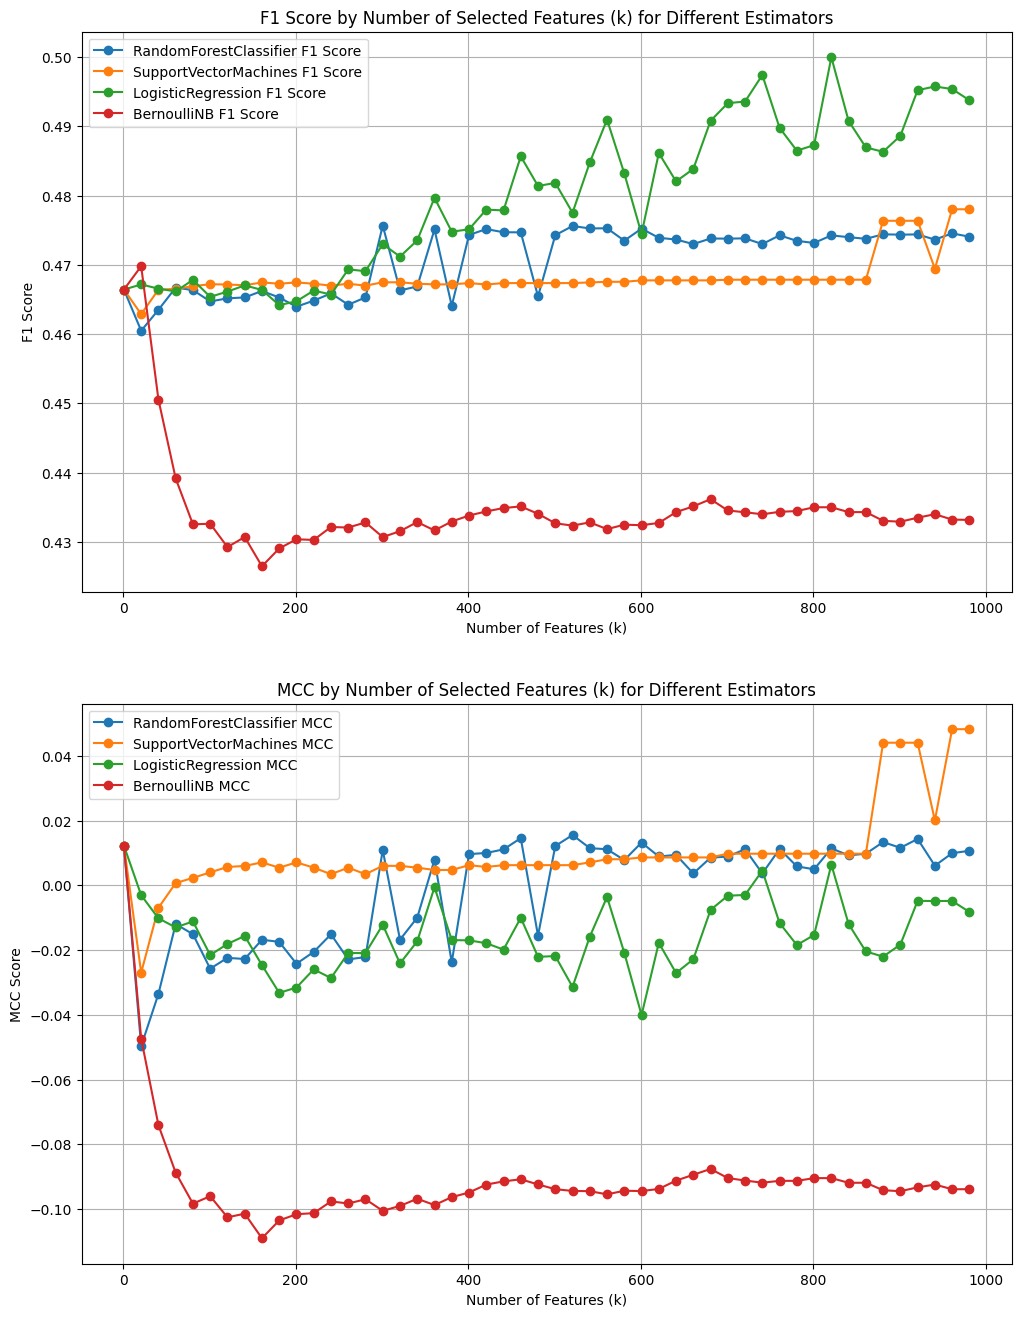

In [1]:
import sys
sys.path.append('../Data_Feature')
sys.path.append('../Datasets')
print(sys.path)
import numpy as np
import os
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB # or GaussianNB if your data is normalized and continuous
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, make_scorer, matthews_corrcoef
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import zipfile 
from bioservices import KEGG
from K_func import translate_ko_terms
from Object_oriented_dataprocess import DataProcessor, GOProcessor, ModelPipeline
from pathlib import Path

zip_path = Path('../Datasets/terms_GO.zip').resolve()
zip_path1 = Path('../Datasets/reducedDataset.zip').resolve()

for i in zip_path, zip_path1:
    if i.exists():
        print(f"Found zip file at: {i}")
    else:
        print(f"Zip file not found at: {i}")


GO_Data = GOProcessor(terms_zip_path=zip_path.absolute(), terms_csv_path="terms_GO.csv", traits_zip_path=zip_path1.absolute(), traits_csv_path="reducedDataset.csv")

# Creating traits and terms from files
GO_terms = GO_Data.load_data_from_zip(GO_Data.terms_zip_path, GO_Data.terms_csv_path)
GO_traits = GO_Data.load_data_from_zip(GO_Data.traits_zip_path, GO_Data.traits_csv_path)


# Feature selection
processed_GO_terms = GO_Data.preprocess_terms(GO_terms)
processed_GO_traits = GO_Data.preprocess_traits_oxygen(GO_traits)


# Aligning and checking data values
X_aligned, Y_aligned = GO_Data.align_data(processed_GO_terms, processed_GO_traits)
print("Before data checking:")
print("Features:", X_aligned.head())
print("Labels:", Y_aligned)

# Here, ensure Y_aligned is the output you expect (i.e., it should be a series or array of labels)
# Let's assume Y_aligned now needs to be passed through the data_checker function.
# First, ensure it's properly formatted if necessary (e.g., if Y_aligned is not already encoded, encode it)

encoded_labels, class_distribution = GO_Data.data_checker(Y_aligned)
print("After data checking:")
print("Encoded Labels:", encoded_labels)
print("Class Distribution:", class_distribution)


GO_pipeline = ModelPipeline(X_aligned,encoded_labels)

GO_pipeline.setup_pipeline([
    ('select_k', SelectKBest(f_classif)),
    ('estimator', RandomForestClassifier())
])

param_grid = [
    {
        'select_k__k': [10, 50, 100, 200, 300, 500, 1000],  # May need adjusting  100, 200, 300
        'estimator': [RandomForestClassifier(random_state=42)],
        'estimator__n_estimators': [100, 200],  
        'estimator__max_depth': [5, 10, None]  
    },
    {
        'select_k__k': [10, 50, 100, 200, 300, 500, 1000],  # May need as needed  100, 200, 300
        'estimator': [SVC(random_state=42)],
        'estimator__C': [0.1, 1, 10],  
        'estimator__kernel': ['linear', 'rbf'], 
        'estimator__gamma': ['scale', 'auto']  
    },
    {
        'select_k__k' : [10, 50, 100, 200, 300, 500, 1000],
        'estimator': [LogisticRegression()],
        'estimator__C': [0.01, 0.1, 1, 10, 100]
    },         
    {
        'select_k__k': [10, 50, 100, 200, 300, 500, 1000],  
        'estimator': [BernoulliNB()],
        'estimator__alpha': [0.01, 0.1, 1.0, 10.0],  
        'estimator__binarize': [0.0]  # Is automatically applied
    }
]

GO_pipeline.train_model(param_grid)

GO_pipeline.plot_feature_importance()

GO_pipeline.compare_models()

